# Data for Forecasting

One of the most time-consuming and difficult parts of forecasting is the collection of vaid and reliable data. The most sophisticated forecasting model will fail if it is applied to unreliable data.

Four criteria can be applied when determining whether data will be useful:
1. Data should be reliable and accurate.
1. Data should be relevant.
1. Data should be consistent.
1. Data should be timely.

<font color='red'>*Cross-sectional*</font> data are observations collected at a single point in time.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1234)

data = np.random.randn(5, 2)  # 5x2 matrix of N(0, 1) random draws

df = pd.DataFrame(data,columns=['price','weight'],index=['AR','TX','OK','IL','MO'])
print (df)

       price    weight
AR  0.471435 -1.190976
TX  1.432707 -0.312652
OK -0.720589  0.887163
IL  0.859588 -0.636524
MO  0.015696 -2.242685


A <font color='red'>*time series*</font> consists of data that are collected, recorded, or observed over successive increments of time

In [2]:
data = np.random.randn(5, 2)  # 5x2 matrix of N(0, 1) random draws
dates = pd.date_range('2010-12-28', periods=5)

df = pd.DataFrame(data, columns=('price', 'weight'), index=dates)
print(df)

               price    weight
2010-12-28  1.150036  0.991946
2010-12-29  0.953324 -2.021255
2010-12-30 -0.334077  0.002118
2010-12-31  0.405453  0.289092
2011-01-01  1.321158 -1.546906


Examples of time series data are:

- Daily IBM stock prices
- Monthly rainfall
- Quarterly sales results for Amazon
- Annual Google profits

## Data Patterns

One of the most important steps in selecting an appropriate forecasting method for time series data is to understand data patterns.

There are typical four general types of time series patterns:
- stationary: fluctuation around a constant level of mean
- trend: the long-term component that represents the growth or decline over an extended period of time
- seasonal: a pattern of change that repeats itself year after year
- cyclical: the wavelike fluctuation around the trend

## Stationary Time Series Data with Seasonality

- e.g. Monthly Beer Production in Australia

<AxesSubplot:xlabel='Month'>

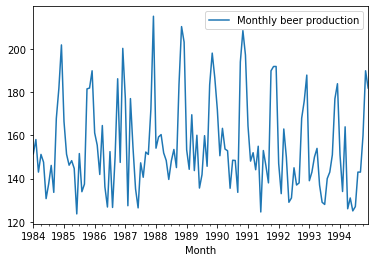

In [3]:
# importing the libraries
import pandas as pd
import matplotlib
 
# importing dataset
data = pd.read_csv(
    r'/Users/dkoh/Dropbox/teaching/ECON4753_FA2022/data/monthly-beer-production-in-austr.csv')
  
# casting Month column to datetime object
data['Month'] = pd.to_datetime(data['Month'])
 
# Setting Month as index
data = data.set_index('Month') 
 
# Creating the plot
data['1984':'1994'].plot()

## Time Series Data with a Trend and Seasonality
- Electricity Production
- Original quarterly GDP (not seasonality adjusted)

<AxesSubplot:xlabel='DATE'>

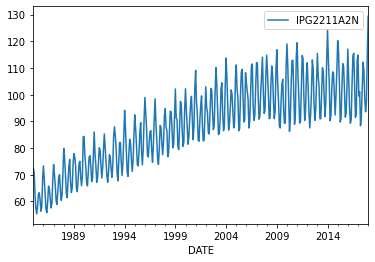

In [4]:
# importing the libraries
import pandas as pd
import matplotlib
 
# importing dataset
data = pd.read_csv(r'/Users/dkoh/Dropbox/teaching/ECON4753_FA2022/data/Electric_Production.csv')
 
# casting Month column to datetime object
data['DATE'] = pd.to_datetime(data['DATE'])
 
# Setting Month as index
data = data.set_index('DATE')
 
# Creating the plot
data.plot()

## Stationary Data with Cyclicality
- Unemployment rate

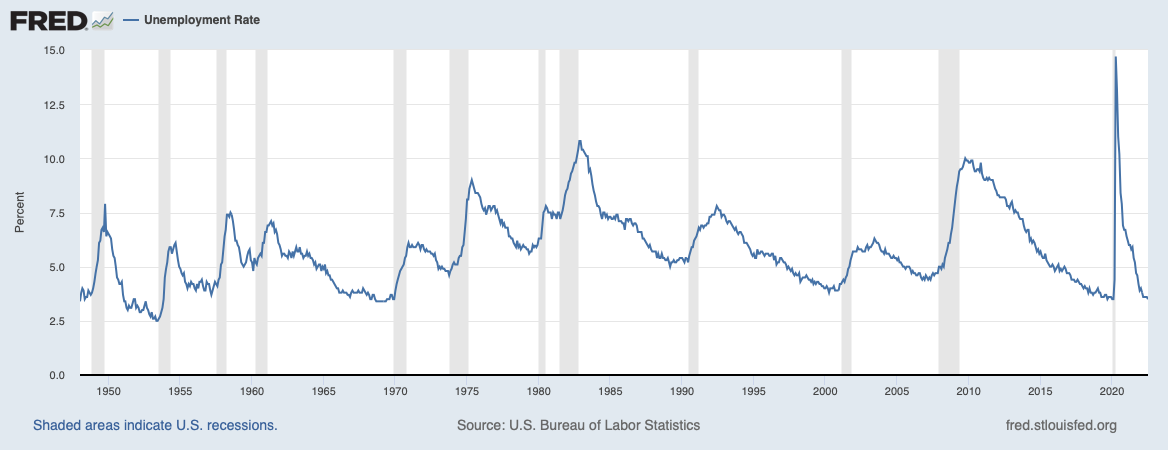

In [5]:
from IPython.display import Image
Image("data/FRED_unrate.png")

## Nonstationary Data with Cyclicality

- Consumption expenditure
- Gross private investment

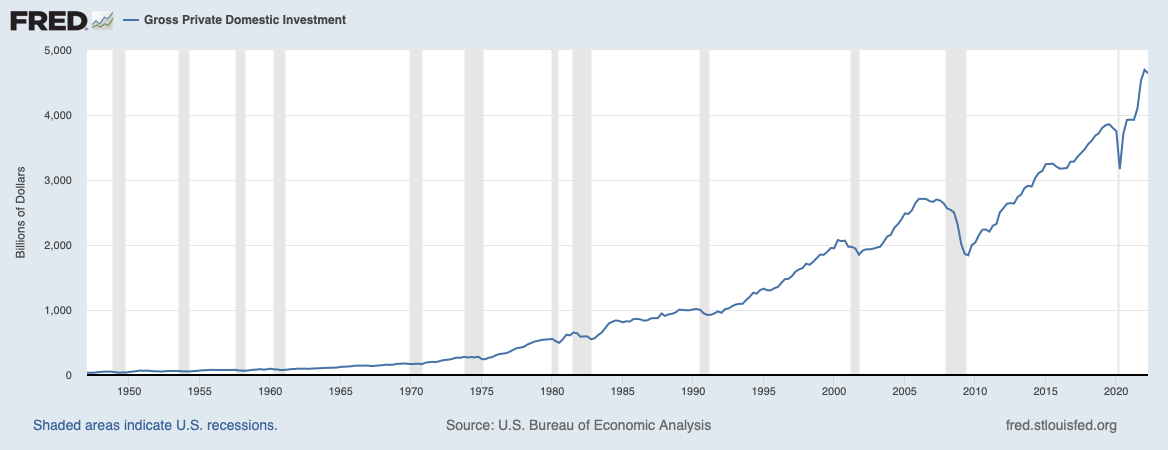

In [6]:
from IPython.display import Image
Image("data/FRED_inv.png")

## Autocorrelation Analysis

<font color='red'>*Correlation*</font> is the degree to which two variables move in relation to each other.

$r = \frac{\sum_{t=1}^T (X_t - \bar{X})(Y_{t} - \bar{Y})}{\sqrt{\sum_{t=1}^{T}(X_t - \bar{X})^2 \sum_{t=1}^{T}(Y_t - \bar{Y})^2}}$

<font color='red'>*Autocorrelation*</font> is the correlation between a variable lagged one or more time periods and itself.

$r_k = \frac{\sum_{t=k+1}^{T} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{T}(Y_t - \bar{Y})^2}$

## How can we use autocorrelation?

Autocorrelation coefficients for different time lags for a variable can be used to answer the following questions about a time series:

1. Are the data random?
1. Do the data have a trend (are they nonstationary)?
1. Are the data stationary?
1. Are the data seasonal?

## Correlogram
<font color='red'>*Correlogram*</font> or autocorrelation function is a graph of the autocorrelations for various lags of a time series.

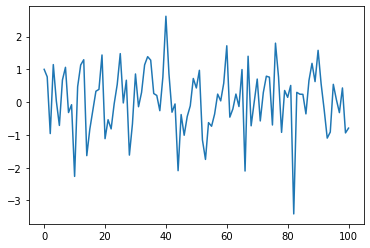

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

ts_length = 100
y_values = [1]
ρ = 0.3     # persistence of shocks
α = 0.0    # trend
i = 0
while i < ts_length:
    e = np.random.randn()
    y_values.append(α*i + ρ*y_values[i] + e)
    i = i + 1
plt.plot(y_values)
plt.show()

0 0.0661976300777306
1 -0.017686958730334473
2 -0.11705225204509698
3 -0.1084083936842272
4 -0.07148739459285357
5 -0.008079454387275233
6 0.038628680813656655
7 -0.028990743728935377
8 -0.033617464433199754
9 -0.02164585432707712


(0.0, 10.0)

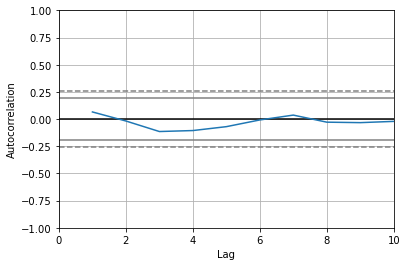

In [10]:
s = pd.Series(y_values)
for i in range(10):
    print(i,s.autocorr(lag=i+1))

# plotting the Curve
pd.plotting.autocorrelation_plot(s).set_xlim([0, 10])

## To check data patterns

- Create a line plot
- Calculate summary statistics
- Create an autocorrelation plot